In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import math
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [56]:
stock=yf.download("TCS.BO",period="10y",actions=True)
stock

C:\Users\Omkar Singh\Documents\Regression\.venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2014-02-24,1103.000000,1103.000000,1085.599976,1089.099976,871.011230,181384,0.0,0.0
2014-02-25,1095.000000,1099.849976,1090.750000,1094.150024,875.049988,105698,0.0,0.0
2014-02-26,1095.500000,1097.500000,1089.275024,1091.199951,872.690735,69202,0.0,0.0
2014-02-28,1084.000000,1138.500000,1080.000000,1136.400024,908.839600,293910,0.0,0.0
2014-03-03,1135.000000,1148.449951,1116.599976,1120.425049,896.063538,131848,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-02-16,4112.049805,4147.000000,4100.899902,4129.200195,4129.200195,132816,0.0,0.0
2024-02-19,4119.149902,4121.649902,4055.100098,4101.600098,4101.600098,56840,0.0,0.0
2024-02-20,4089.899902,4098.850098,4011.100098,4029.949951,4029.949951,30284,0.0,0.0


<Axes: xlabel='Date', ylabel='Close'>

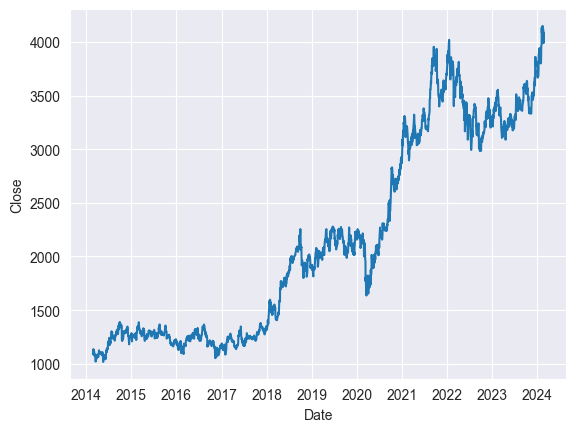

In [57]:
sns.lineplot(data=stock,x="Date",y="Close")

In [58]:
data=stock.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.75)
training_data_len

1832

In [59]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.02291015],
       [0.02452265],
       [0.02358068],
       ...,
       [0.96193884],
       [0.94895911],
       [0.97997958]])

In [60]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    
    

In [61]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1772, 60, 1)

In [62]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [63]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [64]:
model.fit(x_train,y_train,epochs=10,batch_size=1)

Epoch 1/10
1772/1772 [==============================] - 27s 14ms/step - loss: 0.0015
Epoch 2/10
1772/1772 [==============================] - 25s 14ms/step - loss: 5.1455e-04
Epoch 3/10
1772/1772 [==============================] - 24s 14ms/step - loss: 4.1694e-04
Epoch 4/10
1772/1772 [==============================] - 23s 13ms/step - loss: 2.8488e-04
Epoch 5/10
1772/1772 [==============================] - 24s 14ms/step - loss: 2.6434e-04
Epoch 6/10
1772/1772 [==============================] - 25s 14ms/step - loss: 2.9676e-04
Epoch 7/10
1772/1772 [==============================] - 23s 13ms/step - loss: 2.0945e-04
Epoch 8/10
1772/1772 [==============================] - 24s 14ms/step - loss: 2.2056e-04
Epoch 9/10
1772/1772 [==============================] - 24s 13ms/step - loss: 1.9160e-04
Epoch 10/10
1772/1772 [==============================] - 23s 13ms/step - loss: 1.9898e-04


In [65]:
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [66]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [67]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


20/20 [==============================] - 1s 7ms/step


In [68]:
rmse= np.sqrt(((predictions - y_test) ** 2).mean())
rmse

67.2200560709455

In [69]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions


C:\Users\Omkar Singh\AppData\Local\Temp\ipykernel_21800\3719394615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


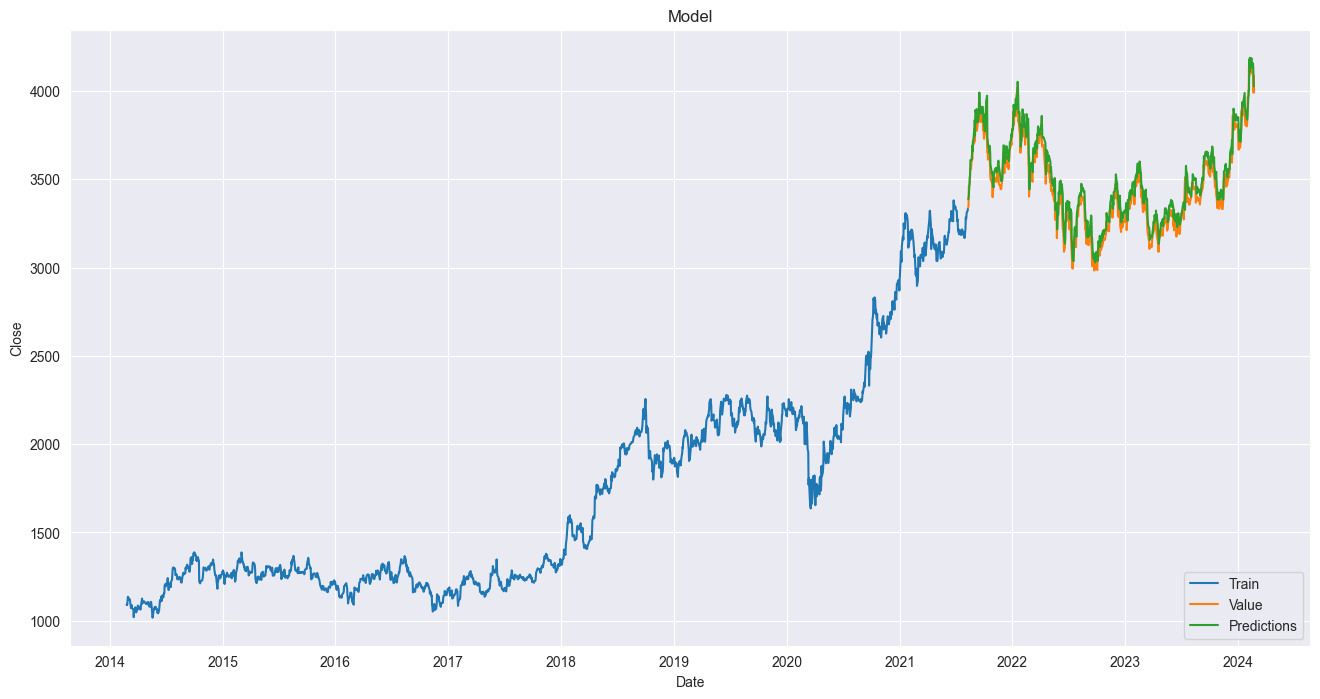

In [70]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Value','Predictions'], loc='lower right')
plt.show()

In [71]:
valid

,Close,Predictions
Date,,
2021-08-11,3340.550049,3386.996338
2021-08-12,3353.949951,3393.439453
2021-08-13,3461.899902,3406.373047
2021-08-16,3471.750000,3514.138672
2021-08-17,3552.399902,3515.346680
...,...,...
2024-02-16,4129.200195,4138.447754
2024-02-19,4101.600098,4156.858887
2024-02-20,4029.949951,4127.610352


In [72]:
"""start=input("Enter End Date")
end=input("Enter End Date")
quote=yf.download("TCS.BO",start='2012-01-01',end='2024-02-22')
new_df=quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test.shape[0],(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)"""

'start=input("Enter End Date")\nend=input("Enter End Date")\nquote=yf.download("TCS.BO",start=\'2012-01-01\',end=\'2024-02-22\')\nnew_df=quote.filter([\'Close\'])\nlast_60_days=new_df[-60:].values\nlast_60_days_scaled=scaler.transform(last_60_days)\nX_test=[]\nX_test.append(last_60_days_scaled)\nX_test=np.array(X_test)\nX_test=np.reshape(X_test.shape[0],(X_test.shape[0],X_test.shape[1],1))\npred_price=model.predict(X_test)\npred_price=scaler.inverse_transform(pred_price)\nprint(pred_price)'